# Week 3 - Classification
### Katy Koenig
This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [6]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas as pd
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [7]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

In [ ]:
lucem_illud_2020.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [ ]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

Now we fit the model by giving it our training data

In [ ]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [88]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
misc.forsale,0.072340,0.895257,0.896552,0.786819,0.825397
comp.windows.x,0.068085,0.901650,0.884956,0.784086,0.840336
comp.sys.mac.hardware,0.093617,0.843451,0.861702,0.689153,0.723214
rec.autos,0.106383,0.905778,0.714286,0.680738,0.929204


This lets us look at which classes do better:

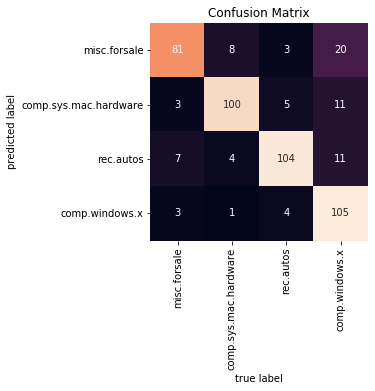

In [89]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

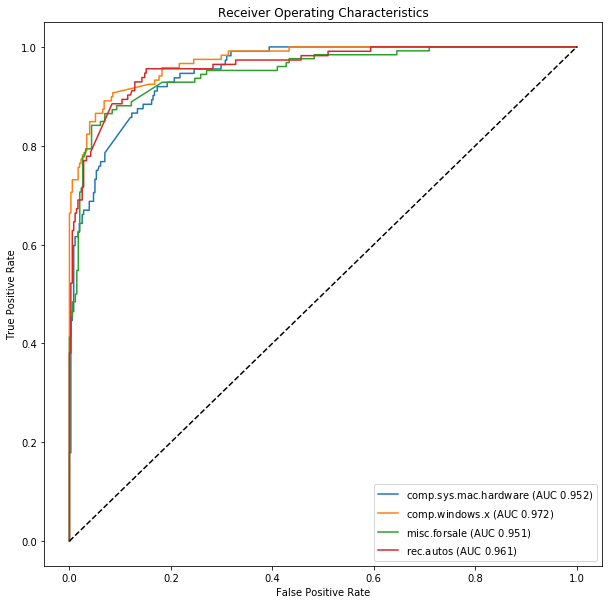

In [90]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

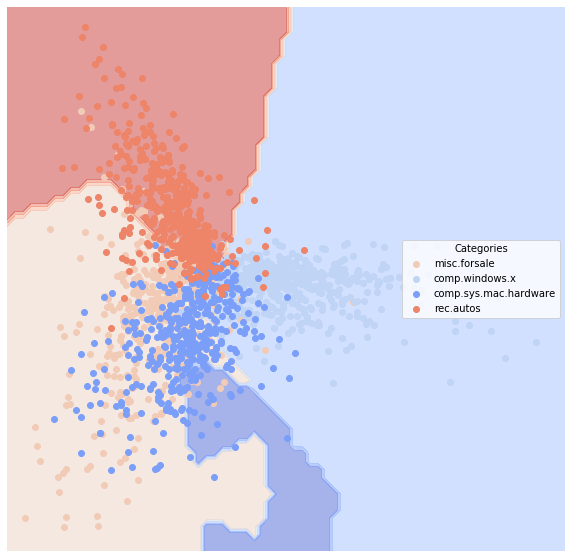

In [91]:
lucem_illud_2020.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [66]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

In [ ]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [ ]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

In [ ]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

In [ ]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

In [ ]:
lucem_illud_2020.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In [47]:
clfs_dict = {'bayes': sklearn.naive_bayes.GaussianNB(),
             'svm_one': sklearn.svm.SVC(kernel='linear', probability=False),
             'svm_two': sklearn.svm.SVC(kernel='poly', degree=3, probability=False),
             'knn': sklearn.neighbors.KNeighborsClassifier(5, weights='distance'),
             'log_reg': sklearn.linear_model.LogisticRegression(),
             'decision_tree': sklearn.tree.DecisionTreeClassifier(),
             'random_forest': sklearn.ensemble.RandomForestClassifier(),
             'neural_net': sklearn.neural_network.MLPClassifier(),
             'gradient_boost': sklearn.ensemble.GradientBoostingClassifier()}

In [84]:
# gen fake data
noises = [0.1, 0.7]
for noise in noises:
    fake_datasets = [("Random: No Noise", lucem_illud_2020.random()),
                     (f"Split: Noise = {noise}", lucem_illud_2020.andSplit(noise)),
                     (f"Xor Splot: Noise = {noise}", lucem_illud_2020.xorSplit(noise)),
                     (f"Target Split: Noise = {noise}", lucem_illud_2020.targetSplit(noise)),
                     (f"Multiblobs: Noise = {noise}", lucem_illud_2020.multiBlobs(noise))]


bayes
Random: No Noise
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.555  0.445   0.452991           0.475085    0.53
1              0.555  0.445   0.433735           0.476145    0.36


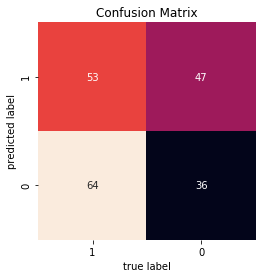

svm_one
Random: No Noise
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.565  0.435   0.432990           0.471856    0.42
1              0.565  0.435   0.436893           0.471602    0.45


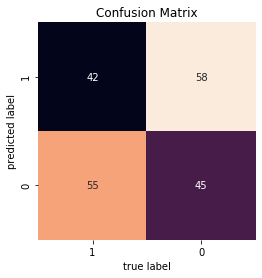

svm_two
Random: No Noise
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.565  0.435   0.452555           0.470584    0.62
1              0.565  0.435   0.396825           0.474206    0.25


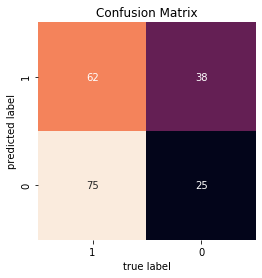

knn
Random: No Noise
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.475  0.525   0.525253           0.513131    0.52
1              0.475  0.525   0.524752           0.513119    0.53


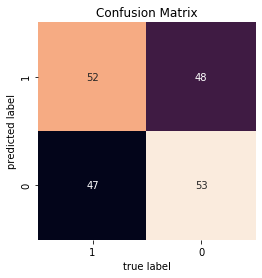

log_reg
Random: No Noise
          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
0               0.55  0.45   0.445652           0.477717    0.41
1               0.55  0.45   0.453704           0.477315    0.49


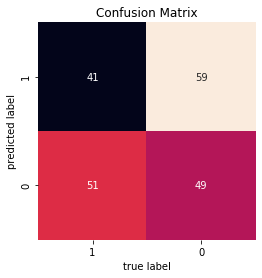

decision_tree
Random: No Noise
          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
0               0.44  0.56   0.556604           0.533396    0.59
1               0.44  0.56   0.563830           0.533830    0.53


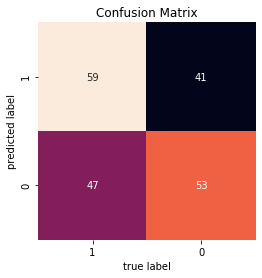

random_forest
Random: No Noise
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.505  0.495   0.495652           0.497522    0.57
1              0.505  0.495   0.494118           0.497529    0.42


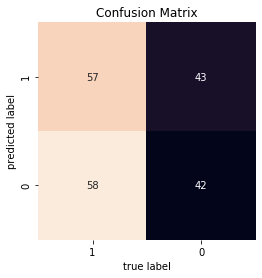

neural_net
Random: No Noise
          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
0               0.54  0.46   0.462963           0.481481    0.50
1               0.54  0.46   0.456522           0.481739    0.42


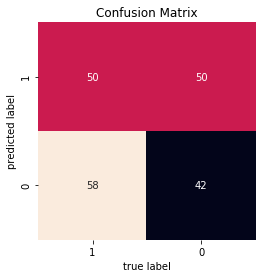

gradient_boost
Random: No Noise
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.535  0.465   0.464646           0.483737    0.46
1              0.535  0.465   0.465347           0.483713    0.47


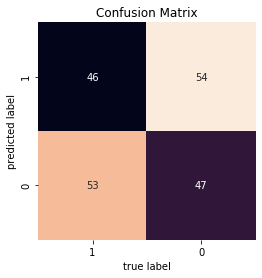

bayes
Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.335  0.666465   0.623762           0.572142  0.684783
1              0.335  0.666465   0.707071           0.648287  0.648148


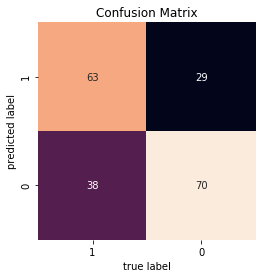

svm_one
Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.335  0.666465   0.623762           0.572142  0.684783
1              0.335  0.666465   0.707071           0.648287  0.648148


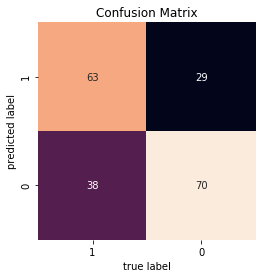

svm_two
Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.34  0.661836   0.617647           0.567954  0.684783
1               0.34  0.661836   0.704082           0.644830  0.638889


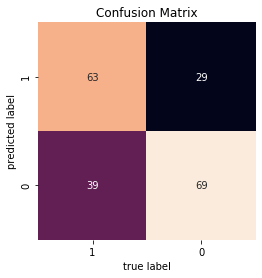

knn
Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.345  0.656401   0.613861           0.563689  0.673913
1              0.345  0.656401   0.696970           0.640286  0.638889


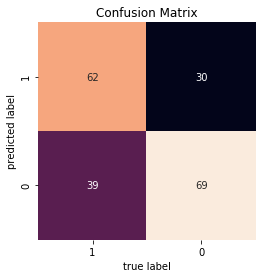

log_reg
Split: Noise = 0.7
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0               0.34  0.65942   0.625000           0.567609  0.652174
1               0.34  0.65942   0.692308           0.641538  0.666667


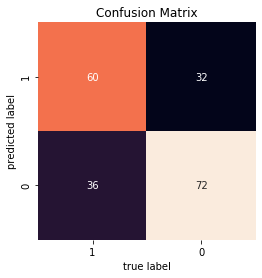

decision_tree
Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.375  0.624597   0.587629           0.539074  0.619565
1              0.375  0.624597   0.660194           0.615678  0.629630


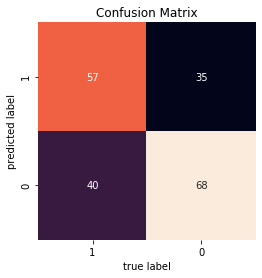

random_forest
Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.35  0.653382   0.603774           0.560016  0.695652
1               0.35  0.653382   0.702128           0.639078  0.611111


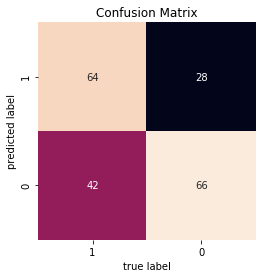

neural_net
Split: Noise = 0.7
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0               0.33  0.67029   0.632653           0.576353  0.673913
1               0.33  0.67029   0.705882           0.650588  0.666667


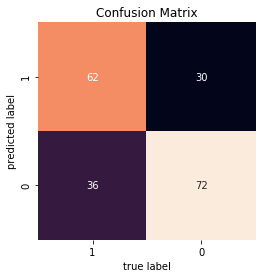

gradient_boost
Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.325  0.674919   0.639175           0.580749  0.673913
1              0.325  0.674919   0.708738           0.654054  0.675926


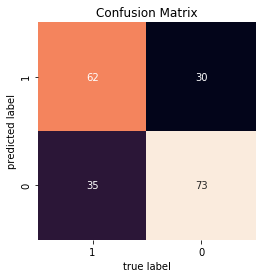

bayes
Xor Splot: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.515  0.482456   0.455556           0.466608  0.431579
1              0.515  0.482456   0.509091           0.516515  0.533333


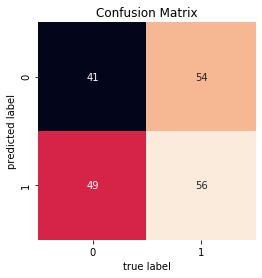

svm_one
Xor Splot: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.465  0.535589   0.509804           0.494051  0.547368
1              0.465  0.535589   0.561224           0.543975  0.523810


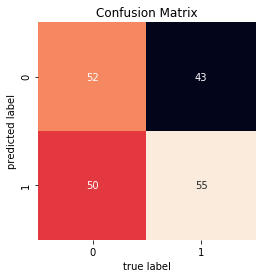

svm_two
Xor Splot: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.355  0.632331   0.750000           0.579211  0.378947
1              0.355  0.632331   0.611842           0.601917  0.885714


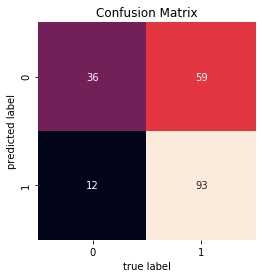

knn
Xor Splot: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.36  0.639599   0.618557           0.565667  0.631579
1               0.36  0.639599   0.660194           0.612554  0.647619


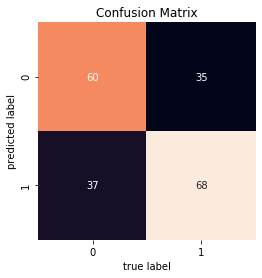

log_reg
Xor Splot: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.525  0.481454   0.460317           0.466036  0.610526
1              0.525  0.481454   0.500000           0.516190  0.352381


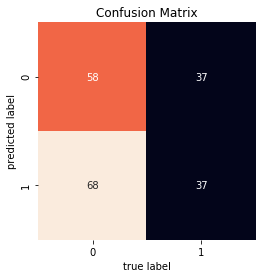

decision_tree
Xor Splot: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.315  0.680952   0.695122           0.607073  0.600000
1              0.315  0.680952   0.677966           0.641546  0.761905


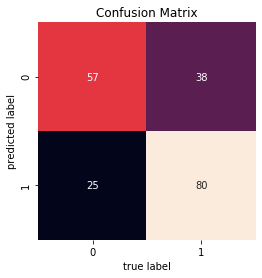

random_forest
Xor Splot: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.365  0.634336   0.614583           0.561689  0.621053
1              0.365  0.634336   0.653846           0.608443  0.647619


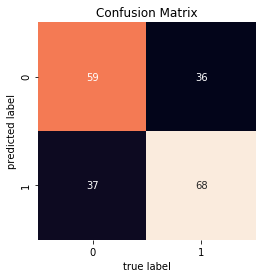

neural_net
Xor Splot: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.295  0.701504   0.714286           0.626128  0.631579
1              0.295  0.701504   0.698276           0.658670  0.771429


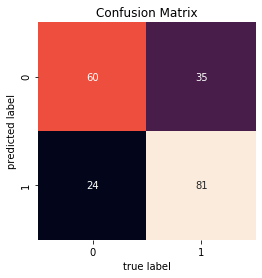

gradient_boost
Xor Splot: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.295  0.702005   0.709302           0.625447  0.642105
1              0.295  0.702005   0.701754           0.659670  0.761905


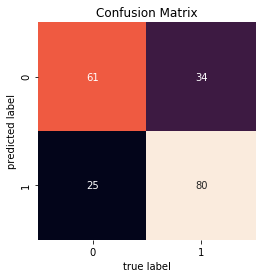

bayes
Target Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.33  0.677778   0.607143            0.56873  0.755556
1               0.33  0.677778   0.750000            0.67000  0.600000


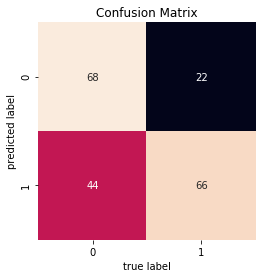

svm_one
Target Split: Noise = 0.7
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0               0.55  0.5       0.45               0.45     1.0
1               0.55  0.5       0.00               0.55     0.0


/Users/katykoeing/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


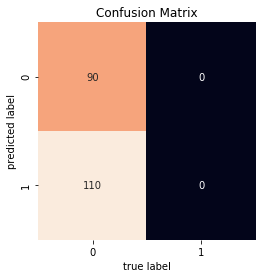

svm_two
Target Split: Noise = 0.7
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0               0.55  0.5       0.45               0.45     1.0
1               0.55  0.5       0.00               0.55     0.0


/Users/katykoeing/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


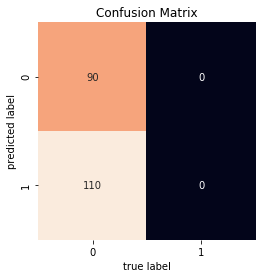

knn
Target Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.345  0.660101   0.598131           0.555337  0.711111
1              0.345  0.660101   0.720430           0.653807  0.609091


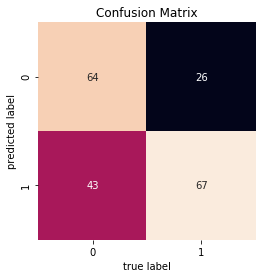

log_reg
Target Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.505  0.513636   0.459854           0.456898  0.700000
1              0.505  0.513636   0.571429           0.557013  0.327273


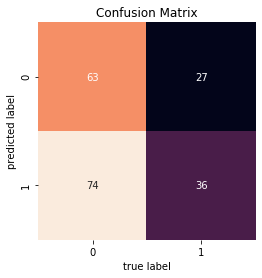

decision_tree
Target Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.425  0.568182   0.529412           0.489706  0.500000
1              0.425  0.568182   0.608696           0.587352  0.636364


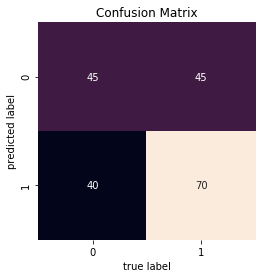

random_forest
Target Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.365  0.640909   0.577982           0.539587  0.700000
1              0.365  0.640909   0.703297           0.639191  0.581818


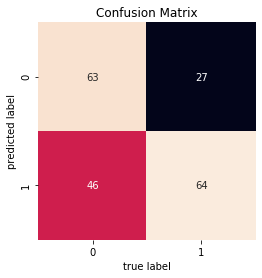

neural_net
Target Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.34  0.664646   0.603774           0.559350  0.711111
1               0.34  0.664646   0.723404           0.657195  0.618182


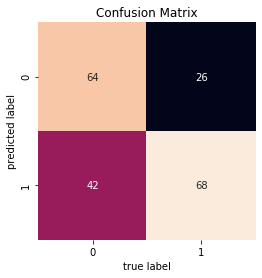

gradient_boost
Target Split: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.37  0.639394   0.568966           0.537241  0.733333
1               0.37  0.639394   0.714286           0.639610  0.545455


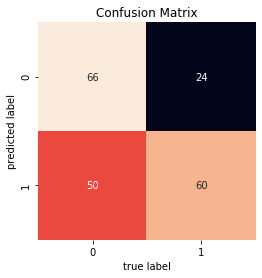

bayes
Multiblobs: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.012  0.982165   0.971963           0.950711  0.971963
1              0.110  0.824539   0.670213           0.533326  0.724138
2              0.032  0.954068   0.912621           0.863370  0.930693
3              0.132  0.792550   0.732673           0.557804  0.654867
4              0.018  0.976343   0.936842           0.912293  0.967391


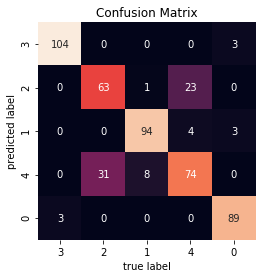

svm_one
Multiblobs: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.012  0.982165   0.971963           0.950711  0.971963
1              0.112  0.827865   0.659794           0.531366  0.735632
2              0.038  0.950309   0.886792           0.839332  0.930693
3              0.132  0.783152   0.747368           0.553585  0.628319
4              0.018  0.976343   0.936842           0.912293  0.967391


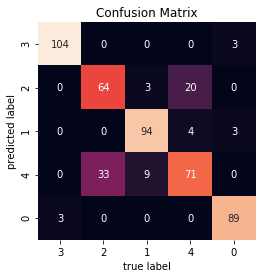

svm_two
Multiblobs: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.014  0.974091   0.980769           0.944939  0.953271
1              0.140  0.847207   0.566929           0.499183  0.827586
2              0.038  0.954006   0.879630           0.839374  0.940594
3              0.158  0.697434   0.765625           0.459997  0.433628
4              0.018  0.980552   0.927835           0.911665  0.978261


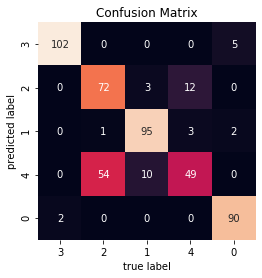

knn
Multiblobs: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.010  0.980036   0.990385           0.961361  0.962617
1              0.168  0.757674   0.513761           0.392697  0.643678
2              0.046  0.930507   0.882353           0.808255  0.891089
3              0.184  0.696302   0.620690           0.414613  0.477876
4              0.016  0.985987   0.928571           0.920478  0.989130


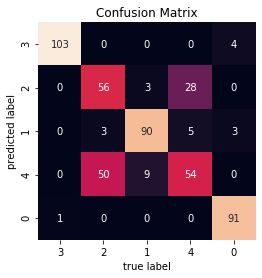

log_reg
Multiblobs: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.014  0.984293   0.954545           0.940703  0.981308
1              0.140  0.856280   0.564885           0.506477  0.850575
2              0.046  0.948994   0.848214           0.809825  0.940594
3              0.172  0.663328   0.745455           0.414475  0.362832
4              0.020  0.966699   0.945652           0.904258  0.945652


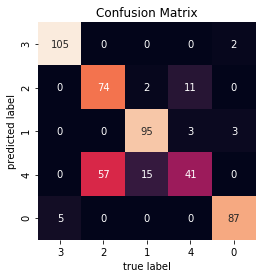

decision_tree
Multiblobs: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.018  0.964745   0.980392           0.930254  0.934579
1              0.162  0.770379   0.527273           0.409515  0.666667
2              0.048  0.932951   0.866667           0.800858  0.900990
3              0.188  0.687453   0.611765           0.403520  0.460177
4              0.020  0.979327   0.918367           0.902403  0.978261


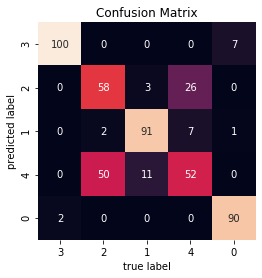

random_forest
Multiblobs: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.010  0.980036   0.990385           0.961361  0.962617
1              0.156  0.823912   0.534884           0.460218  0.793103
2              0.040  0.949056   0.878505           0.831618  0.930693
3              0.168  0.681576   0.730159           0.431233  0.407080
4              0.014  0.987212   0.938144           0.929947  0.989130


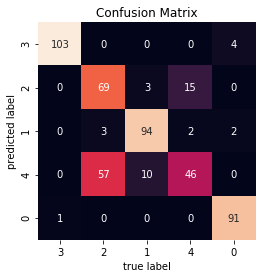

neural_net
Multiblobs: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.010  0.983437   0.981132           0.959624  0.971963
1              0.118  0.815160   0.645833           0.510249  0.712644
2              0.032  0.961463   0.897196           0.862781  0.950495
3              0.136  0.780568   0.731959           0.543903  0.628319
4              0.012  0.984228   0.957447           0.940633  0.978261


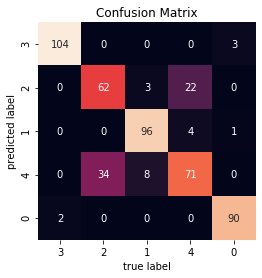

gradient_boost
Multiblobs: Noise = 0.7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.012  0.975363   0.990291           0.954016  0.953271
1              0.136  0.795191   0.594059           0.463696  0.689655
2              0.032  0.954068   0.912621           0.863370  0.930693
3              0.152  0.754568   0.694737           0.499776  0.584071
4              0.016  0.985987   0.928571           0.920478  0.989130


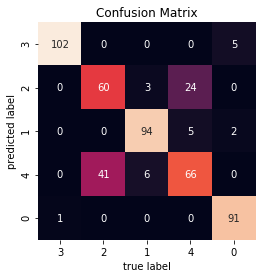

In [185]:
for name, data in fake_datasets:
    dfTrain, dfTest = lucem_illud_2020.trainTestSplit(data)
    for key, val in clfs_dict.items():
        clf = clfs_dict[key]
        clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
        print(key)
        print(name)
        try:
            print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
        finally:
            lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

In [72]:
# now use real data
real_datasets = [("Spam", lucem_illud_2020.loadSpam()),
                 ("Senate Large", lucem_illud_2020.loadSenateLarge()),
                 ("Senate Small", lucem_illud_2020.loadSenateSmall()),
                 ("Reddit", lucem_illud_2020.loadReddit()),
                 ("News", lucem_illud_2020.loadNewsGroups())]

Loading Spam
Loading Ham
Converting to vectors
Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors
Loading senate data
Converting to vectors
Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors


Spam
bayes
          Error_Rate     AUC  Precision  Average_Precision    Recall
Category                                                            
spam        0.157895  0.8152   0.484848           0.410207  0.776699
not spam    0.157895  0.8152   0.955684           0.940137  0.853701


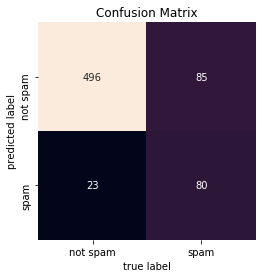

Spam
svm_one
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.097953  0.710701   0.833333           0.448873  0.436893
not spam    0.097953  0.710701   0.907937           0.907030  0.984509


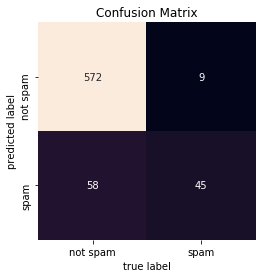

Spam
svm_two


/Users/katykoeing/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
spam        0.150585  0.5   0.000000           0.150585     0.0
not spam    0.150585  0.5   0.849415           0.849415     1.0


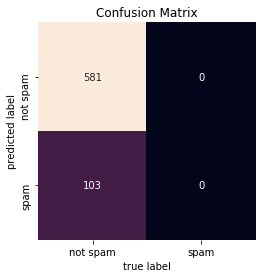

Spam
knn
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
spam        0.095029  0.72041   0.839286           0.464846  0.456311
not spam    0.095029  0.72041   0.910828           0.909877  0.984509


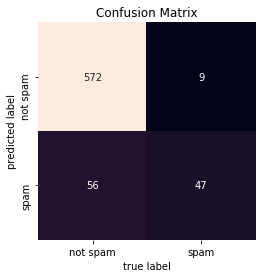

Spam
log_reg
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.121345  0.613063   0.857143           0.315220  0.233010
not spam    0.121345  0.613063   0.879573           0.879366  0.993115


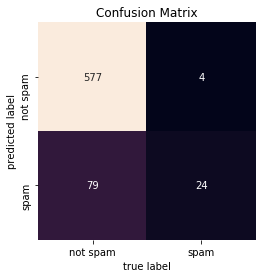

Spam
decision_tree
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.093567  0.757215   0.767123           0.485790  0.543689
not spam    0.093567  0.757215   0.923077           0.920922  0.970740


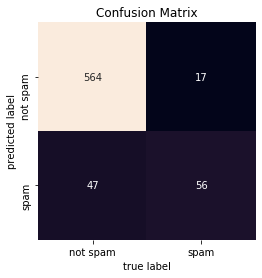

Spam
random_forest
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.095029  0.748367   0.771429           0.476076  0.524272
not spam    0.095029  0.748367   0.920195           0.918246  0.972461


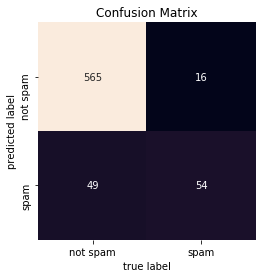

Spam
neural_net
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.087719  0.796601   0.747126           0.527043  0.631068
not spam    0.087719  0.796601   0.936348           0.933057  0.962134


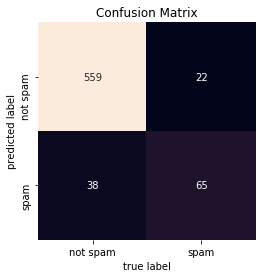

Spam
gradient_boost
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.125731  0.610481   0.774194           0.295892  0.233010
not spam    0.125731  0.610481   0.879020           0.878663  0.987952


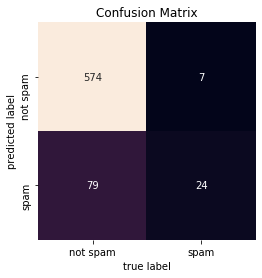

Senate Large
bayes
not enough classes to fit clf
Senate Large
svm_one
not enough classes to fit clf
Senate Large
svm_two
not enough classes to fit clf
Senate Large
knn
not enough classes to fit clf
Senate Large
log_reg
not enough classes to fit clf
Senate Large
decision_tree
not enough classes to fit clf
Senate Large
random_forest
not enough classes to fit clf
Senate Large
neural_net
not enough classes to fit clf
Senate Large
gradient_boost
not enough classes to fit clf
Senate Small
bayes
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Clinton      0.13783  0.853818   0.891509           0.861439  0.887324
Obama        0.13783  0.853818   0.813953           0.735145  0.820312


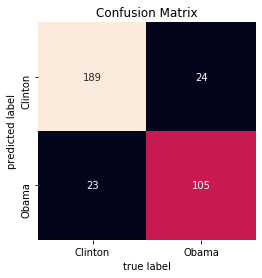

Senate Small
svm_one
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
Clinton          0.0  1.0        1.0                1.0     1.0
Obama            0.0  1.0        1.0                1.0     1.0


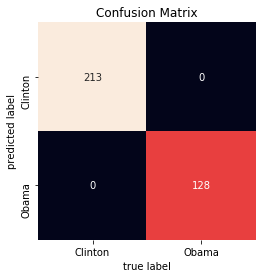

Senate Small
svm_two


/Users/katykoeing/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
Clinton     0.375367  0.5   0.624633           0.624633     1.0
Obama       0.375367  0.5   0.000000           0.375367     0.0


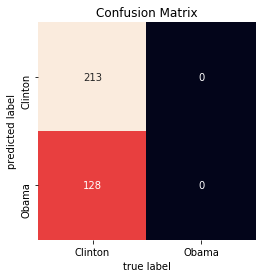

Senate Small
knn
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Clinton     0.117302  0.892074   0.952880           0.905107  0.854460
Obama       0.117302  0.892074   0.793333           0.763945  0.929688


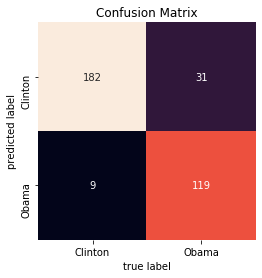

Senate Small
log_reg
          Error_Rate       AUC  Precision  Average_Precision   Recall
Category                                                             
Clinton      0.01173  0.984375   0.981567           0.981567  1.00000
Obama        0.01173  0.984375   1.000000           0.980480  0.96875


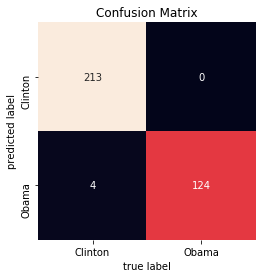

Senate Small
decision_tree
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Clinton     0.005865  0.992188   0.990698           0.990698  1.000000
Obama       0.005865  0.992188   1.000000           0.990240  0.984375


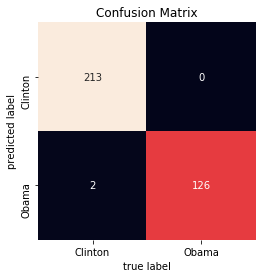

Senate Small
random_forest
          Error_Rate       AUC  Precision  Average_Precision   Recall
Category                                                             
Clinton      0.01173  0.984375   0.981567           0.981567  1.00000
Obama        0.01173  0.984375   1.000000           0.980480  0.96875


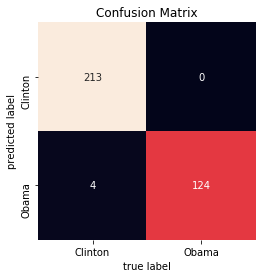

Senate Small
neural_net
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
Clinton     0.041056  0.96246   0.985366           0.966736  0.948357
Obama       0.041056  0.96246   0.919118           0.906373  0.976562


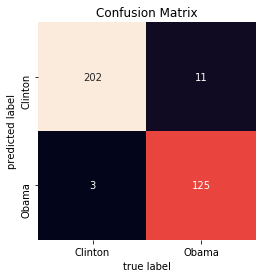

Senate Small
gradient_boost
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Clinton     0.008798  0.988281   0.986111           0.986111  1.000000
Obama       0.008798  0.988281   1.000000           0.985360  0.976562


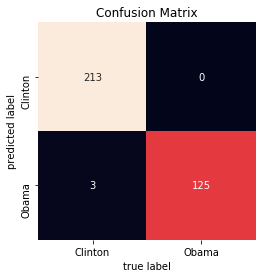

Reddit
bayes
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.178683  0.721584   0.849057           0.560068   
Weeaboo Tales              0.184953  0.865970   0.548387           0.534620   
Tales From Tech Support    0.078370  0.849090   0.947368           0.742096   
Bad Roommates              0.122257  0.849718   0.729412           0.629946   

                           Recall  
Category                           
Relationships            0.478723  
Weeaboo Tales            0.957746  
Tales From Tech Support  0.710526  
Bad Roommates            0.794872  


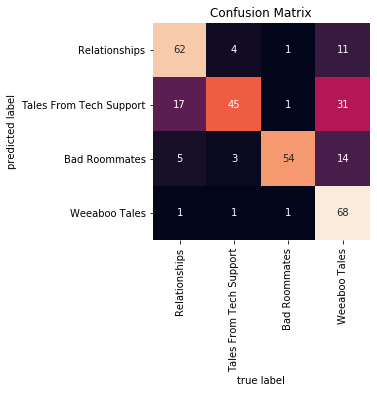

Reddit
svm_one
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.015674  0.985792   0.958763           0.951698   
Weeaboo Tales              0.006270  0.985915   1.000000           0.978101   
Tales From Tech Support    0.003135  0.993421   1.000000           0.989977   
Bad Roommates              0.012539  0.983030   0.974359           0.955645   

                           Recall  
Category                           
Relationships            0.989362  
Weeaboo Tales            0.971831  
Tales From Tech Support  0.986842  
Bad Roommates            0.974359  


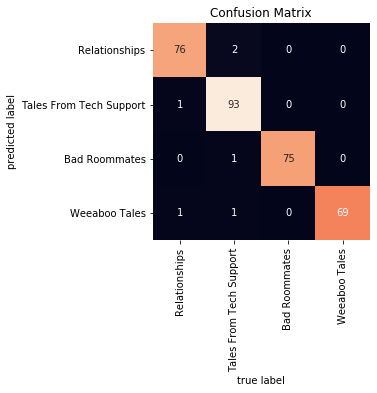

Reddit
svm_two


/Users/katykoeing/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                         Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                                      
Relationships              0.294671  0.5   0.000000           0.294671     0.0
Weeaboo Tales              0.777429  0.5   0.222571           0.222571     1.0
Tales From Tech Support    0.238245  0.5   0.000000           0.238245     0.0
Bad Roommates              0.244514  0.5   0.000000           0.244514     0.0


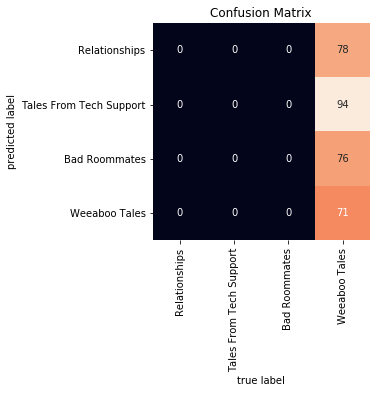

Reddit
knn
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.065831  0.909976   0.919540           0.826475   
Weeaboo Tales              0.059561  0.936563   0.825000           0.782575   
Tales From Tech Support    0.034483  0.950238   0.933333           0.878458   
Bad Roommates              0.047022  0.934195   0.909091           0.840929   

                           Recall  
Category                           
Relationships            0.851064  
Weeaboo Tales            0.929577  
Tales From Tech Support  0.921053  
Bad Roommates            0.897436  


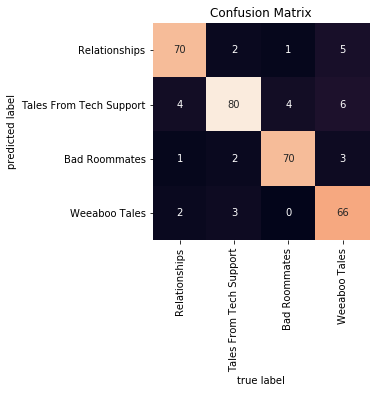

Reddit
log_reg
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.018809  0.980473   0.958333           0.944213   
Weeaboo Tales              0.009404  0.983899   0.985714           0.964217   
Tales From Tech Support    0.006270  0.991363   0.986842           0.976992   
Bad Roommates              0.015674  0.976620   0.974026           0.945968   

                           Recall  
Category                           
Relationships            0.978723  
Weeaboo Tales            0.971831  
Tales From Tech Support  0.986842  
Bad Roommates            0.961538  


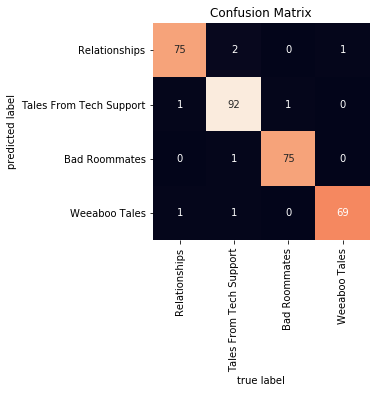

Reddit
decision_tree
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.053292  0.931253   0.923077           0.856225   
Weeaboo Tales              0.037618  0.945650   0.915493           0.856936   
Tales From Tech Support    0.053292  0.915286   0.915493           0.817470   
Bad Roommates              0.062696  0.932493   0.837209           0.791617   

                           Recall  
Category                           
Relationships            0.893617  
Weeaboo Tales            0.915493  
Tales From Tech Support  0.855263  
Bad Roommates            0.923077  


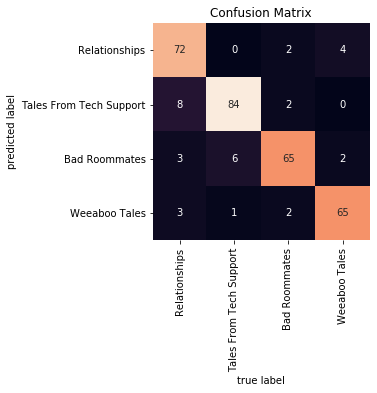

Reddit
random_forest
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.047022  0.935697   0.943820           0.874762   
Weeaboo Tales              0.043887  0.931565   0.913043           0.835244   
Tales From Tech Support    0.028213  0.958875   0.946667           0.900060   
Bad Roommates              0.068966  0.924008   0.825581           0.773434   

                           Recall  
Category                           
Relationships            0.893617  
Weeaboo Tales            0.887324  
Tales From Tech Support  0.934211  
Bad Roommates            0.910256  


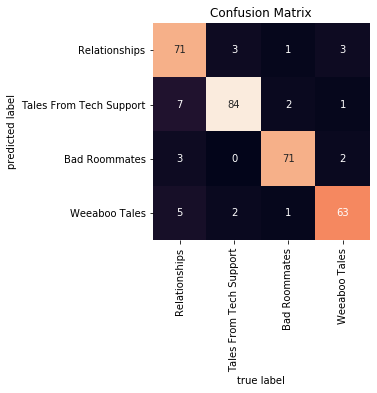

Reddit
neural_net
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.009404  0.990236   0.978947           0.971668   
Weeaboo Tales              0.012539  0.981883   0.971831           0.950725   
Tales From Tech Support    0.003135  0.993421   1.000000           0.989977   
Bad Roommates              0.012539  0.983030   0.974359           0.955645   

                           Recall  
Category                           
Relationships            0.989362  
Weeaboo Tales            0.971831  
Tales From Tech Support  0.986842  
Bad Roommates            0.974359  


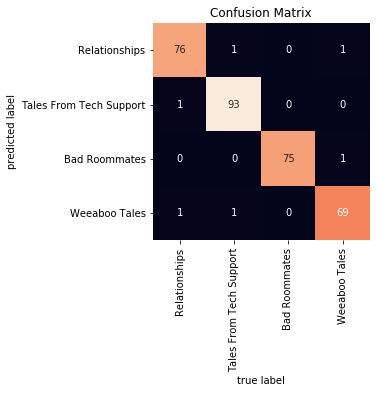

Reddit
gradient_boost
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.015674  0.982695   0.968421           0.954086   
Weeaboo Tales              0.015674  0.964789   1.000000           0.945251   
Tales From Tech Support    0.021944  0.976554   0.936709           0.918328   
Bad Roommates              0.015674  0.980955   0.962025           0.943628   

                           Recall  
Category                           
Relationships            0.978723  
Weeaboo Tales            0.929577  
Tales From Tech Support  0.973684  
Bad Roommates            0.974359  


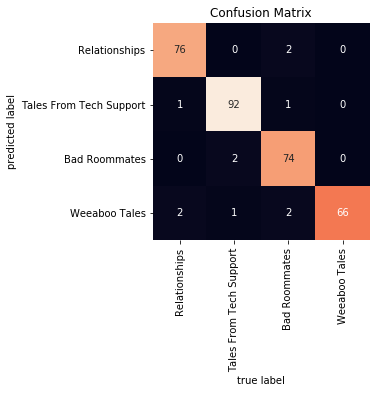

News
bayes
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
misc.forsale             0.131915  0.797817   0.787879           0.603659   
comp.windows.x           0.097872  0.898232   0.742424           0.686964   
comp.sys.mac.hardware    0.155319  0.796813   0.663866           0.538475   
rec.autos                0.095745  0.868956   0.850000           0.729540   

                         Recall  
Category                         
misc.forsale           0.655462  
comp.windows.x         0.890909  
comp.sys.mac.hardware  0.705357  
rec.autos              0.790698  


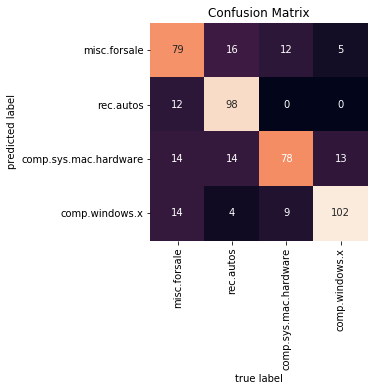

News
svm_one
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
misc.forsale             0.057447  0.919881   0.896552           0.815456   
comp.windows.x           0.034043  0.946212   0.943396           0.878910   
comp.sys.mac.hardware    0.059574  0.917947   0.875000           0.795412   
rec.autos                0.061702  0.930971   0.867647           0.817066   

                         Recall  
Category                         
misc.forsale           0.873950  
comp.windows.x         0.909091  
comp.sys.mac.hardware  0.875000  
rec.autos              0.914729  


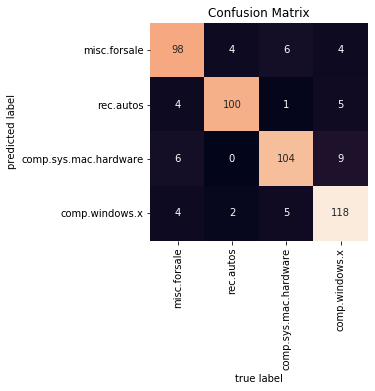

News
svm_two


/Users/katykoeing/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                       Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                                    
misc.forsale             0.253191  0.5   0.000000           0.253191     0.0
comp.windows.x           0.765957  0.5   0.234043           0.234043     1.0
comp.sys.mac.hardware    0.238298  0.5   0.000000           0.238298     0.0
rec.autos                0.274468  0.5   0.000000           0.274468     0.0


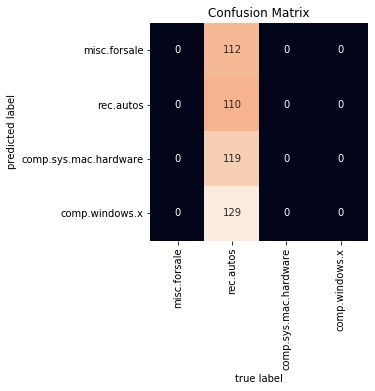

News
knn
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
misc.forsale             0.246809  0.562594   0.538462           0.303533   
comp.windows.x           0.212766  0.545455   1.000000           0.303675   
comp.sys.mac.hardware    0.327660  0.576317   0.338462           0.277648   
rec.autos                0.514894  0.548774   0.305842           0.296114   

                         Recall  
Category                         
misc.forsale           0.176471  
comp.windows.x         0.090909  
comp.sys.mac.hardware  0.392857  
rec.autos              0.689922  


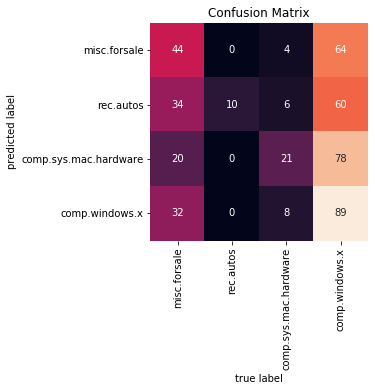

News
log_reg
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
misc.forsale             0.053191  0.922730   0.912281           0.829202   
comp.windows.x           0.040426  0.945202   0.909910           0.854612   
comp.sys.mac.hardware    0.065957  0.898419   0.885714           0.775885   
rec.autos                0.057447  0.941133   0.864286           0.827708   

                         Recall  
Category                         
misc.forsale           0.873950  
comp.windows.x         0.918182  
comp.sys.mac.hardware  0.830357  
rec.autos              0.937984  


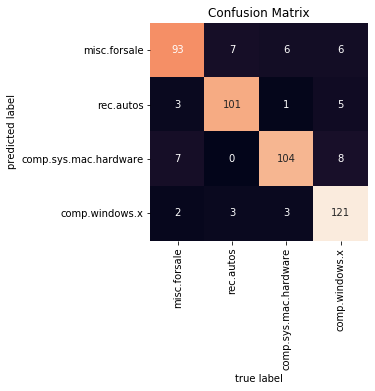

News
decision_tree
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
misc.forsale             0.163830  0.782003   0.677966           0.538754   
comp.windows.x           0.095745  0.877525   0.777778           0.683860   
comp.sys.mac.hardware    0.138298  0.786512   0.742268           0.562279   
rec.autos                0.146809  0.826536   0.717391           0.614386   

                         Recall  
Category                         
misc.forsale           0.672269  
comp.windows.x         0.827273  
comp.sys.mac.hardware  0.642857  
rec.autos              0.767442  


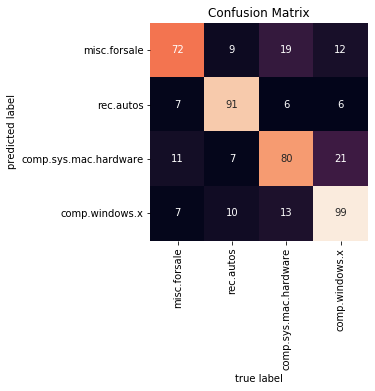

News
random_forest
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
misc.forsale             0.085106  0.870813   0.869159           0.734578   
comp.windows.x           0.095745  0.877525   0.777778           0.683860   
comp.sys.mac.hardware    0.119149  0.832826   0.754545           0.620874   
rec.autos                0.108511  0.872207   0.786765           0.699396   

                         Recall  
Category                         
misc.forsale           0.781513  
comp.windows.x         0.827273  
comp.sys.mac.hardware  0.741071  
rec.autos              0.829457  


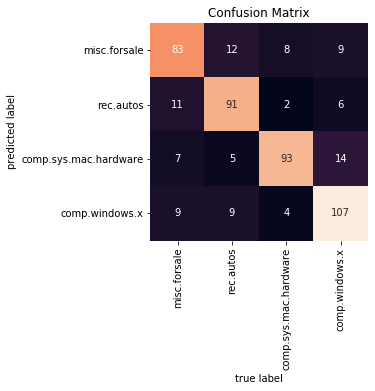

News
neural_net
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
misc.forsale             0.063830  0.901721   0.908257           0.798162   
comp.windows.x           0.034043  0.949369   0.935185           0.877819   
comp.sys.mac.hardware    0.068085  0.906225   0.857143           0.768736   
rec.autos                0.076596  0.918298   0.829787           0.778130   

                         Recall  
Category                         
misc.forsale           0.831933  
comp.windows.x         0.918182  
comp.sys.mac.hardware  0.857143  
rec.autos              0.906977  


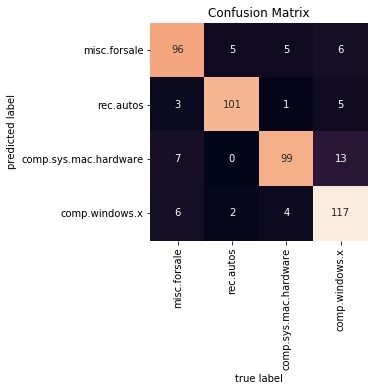

News
gradient_boost
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
misc.forsale             0.091489  0.866540   0.845455           0.716053   
comp.windows.x           0.076596  0.893182   0.836364           0.737802   
comp.sys.mac.hardware    0.159574  0.830831   0.627586           0.554595   
rec.autos                0.110638  0.832185   0.866667           0.692221   

                         Recall  
Category                         
misc.forsale           0.781513  
comp.windows.x         0.836364  
comp.sys.mac.hardware  0.812500  
rec.autos              0.705426  


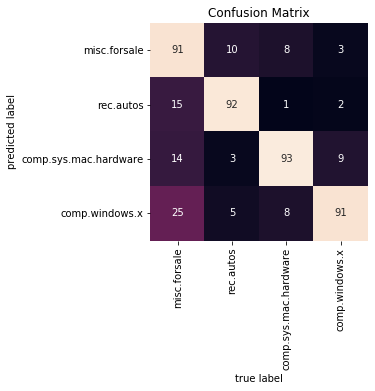

In [184]:
for name, data in real_datasets:
    dfTrain, dfTest = lucem_illud_2020.trainTestSplit(data)
    for key, val in clfs_dict.items():
        clf = clfs_dict[key]
        print(name)
        print(key)
        try:
            clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
            print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
            lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
        except:
            print(f'not enough classes to fit clf')

In [67]:
# stretch
mixed_datasets = [("Random: No Noise", lucem_illud_2020.random()),
                  ("Reddit", lucem_illud_2020.loadReddit())]

Loading Reddit data
Converting to vectors


Random: No Noise
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.46  0.540154   0.546392           0.526720  0.524752
1               0.46  0.540154   0.533981           0.516656  0.555556


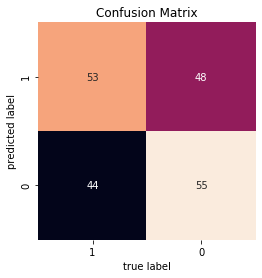

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


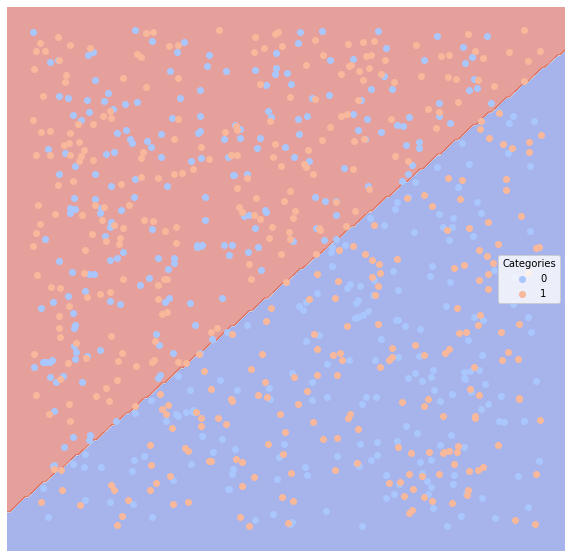

Reddit
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.021944  0.985714   0.913580           0.913580   
Weeaboo Tales              0.012539  0.977689   0.986111           0.955538   
Tales From Tech Support    0.015674  0.970238   1.000000           0.956150   
Bad Roommates              0.012539  0.984195   0.977011           0.960821   

                           Recall  
Category                           
Relationships            1.000000  
Weeaboo Tales            0.959459  
Tales From Tech Support  0.940476  
Bad Roommates            0.977011  


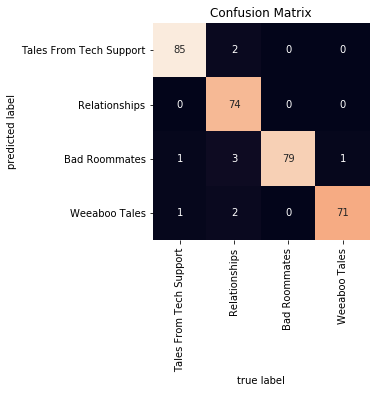

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

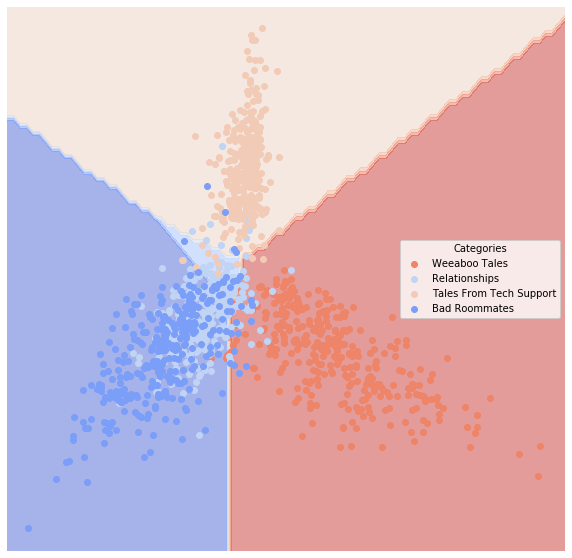

In [183]:
for name, data in mixed_datasets:
    dfTrain, dfTest = lucem_illud_2020.trainTestSplit(data)
    clf = sklearn.linear_model.SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(name)
    print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
    lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
    lucem_illud_2020.plotregions(clf, dfTrain)

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [104]:
ObamaClintonReleases = pd.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

Let's turn the 'targetSenator' column into a binary category variable.

In [105]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [11]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Let's split the data into training data and testing data.

In [ ]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [ ]:
print(len(train_data_df))
print(len(test_data_df))

## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [ ]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [18]:
TFVects.shape

(1368, 11261)

We can save this in the dataframe to make things easier

In [19]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [20]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [21]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


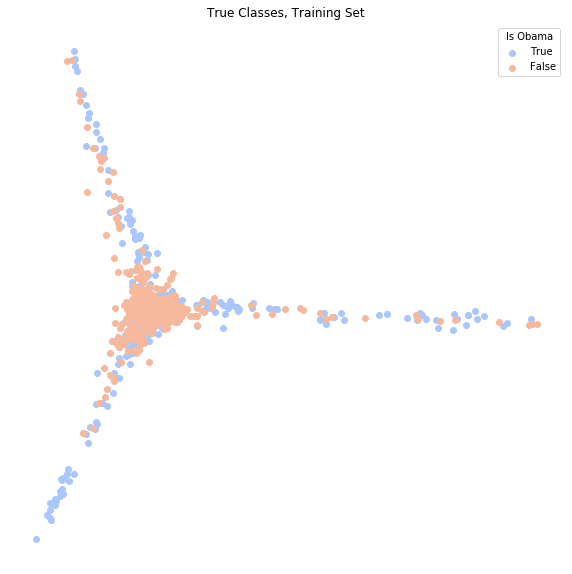

In [22]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

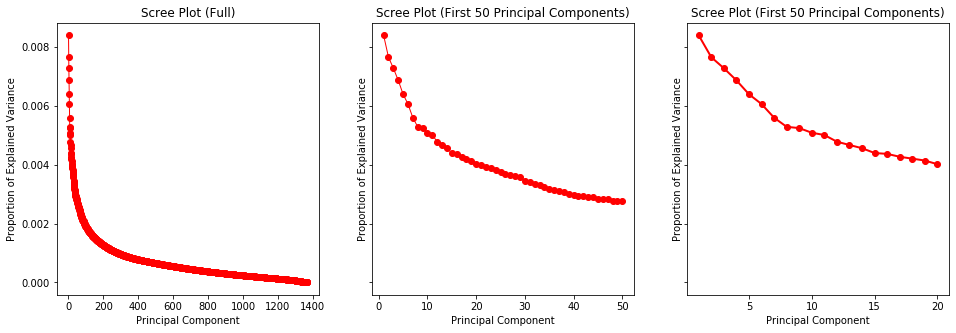

In [23]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [24]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [25]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [26]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.668859649122807

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [27]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6451612903225806

Slightly poorer. How about using more dimensions (40)?

In [28]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7478070175438597
Testing:
0.6979472140762464


Or still more (100)?

In [29]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8289473684210527
Testing:
0.7771260997067448


Or even more (200)!

In [30]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8654970760233918
Testing:
0.8093841642228738


This is becoming ridiculous (400)!

In [31]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9057017543859649
Testing:
0.8328445747800587


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [32]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9568713450292398


Train the model using training data, and then test it on the testing data.

In [33]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8387096774193549


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [34]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [35]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9619883040935673
Testing:
0.8709677419354839


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [36]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [37]:
sklearn.metrics.precision_score(test_data_df['nb_predict'], test_data_df['category'])

0.8424657534246576

Recall:

In [38]:
sklearn.metrics.recall_score(test_data_df['nb_predict'], test_data_df['category'])

0.8541666666666666

F1-measure:

In [39]:
sklearn.metrics.f1_score(test_data_df['nb_predict'], test_data_df['category'])

0.8482758620689655

Let's take a look at how well our posterior distribution looks relative to the truth.

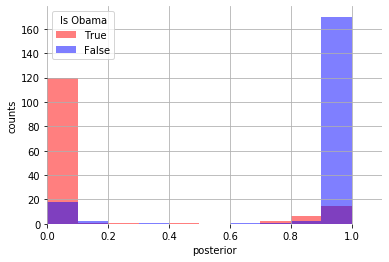

In [40]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [41]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pd.DataFrame(words_dict)

,Obama,Obama_log_prob,Clinton,Clinton_log_prob
0,signature,-2.286604,5566,-1.751858
1,welcomed,-2.311297,amy,-1.762115
2,fy,-2.336615,brundage,-1.848189
3,ground,-2.336615,dick,-1.848189
4,urging,-2.389259,chicago,-1.993020
5,panel,-2.402864,affairs,-2.046366
6,honor,-2.416658,temporary,-2.132133
7,environment,-2.430644,location,-2.209691
8,urban,-2.430644,political,-2.276383
9,class,-2.444828,cases,-2.293774


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [115]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [116]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pd.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pd.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


In [117]:
newsgroupsDF.head()

,text,category,source_file
0,\n\nParadise and salvation are not the same th...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...
1,\nYou're admitting a lot more than that. You ...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...
2,"\n\nJesus also recognized other holy days, lik...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...
3,In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...
4,"\nI'm sorry, but He does not! Ever read the F...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...


Now we need to tokenize, and make a training and testing set:

In [118]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [ ]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [ ]:
print(len(train_ng_df))
print(len(test_ng_df))

We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [ ]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [ ]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

...and save predictions to the dataframe:

In [ ]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

In [ ]:
train_ng_df[['category', 'nb_predict']][:10]

Looks pretty good, lets examine the testing dataset:

In [ ]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

In [ ]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [ ]:
print(sklearn.metrics.precision_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #F-1 measure

We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [ ]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

In [ ]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

In [ ]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [188]:
# Clean Data
tal_df = pd.read_csv("TAL_responses.csv")
cleaned = tal_df.drop(columns=['Timestamp']).T.reset_index(). \
                      rename(columns={'index': 'text'}). \
                      replace({'Private life': True, 'Public life': False, 'Neither': False})
# majority vote for "true" label
cleaned['category'] = cleaned[[0, 1, 2, 3, 4]].mean(axis=1).astype('bool')
cleaned['tokenized_text'] = cleaned['text']. \
                            apply(lambda x: lucem_illud_2020.word_tokenize(x))
cleaned['normalized_text'] = cleaned['tokenized_text']. \
                             apply(lambda x: lucem_illud_2020.normalizeTokens(x))
cleaned.head()

,text,0,1,2,3,4,category,tokenized_text,normalized_text
0,"When I visit my parents, we don't usually do m...",True,True,True,True,True,True,"[When, I, visit, my, parents, we, do, n't, usu...","[visit, parent, usually, sit, living, room, al..."
1,"The lyrics were pretty on the nose. ""Beautiful...",False,False,False,False,False,False,"[The, lyrics, were, pretty, on, the, nose, Bea...","[lyric, pretty, nose, beautiful, beloved, mexi..."
2,She didn't say she was buzzy. She said she was...,True,False,False,False,False,True,"[She, did, n't, say, she, was, buzzy, She, sai...","[buzzy, say, buggy]"
3,"Hey, Google. Play Frank Sinatra. You have to s...",True,False,False,False,True,True,"[Hey, Google, Play, Frank, Sinatra, You, have,...","[hey, google, play, frank, sinatra]"
4,Do you think that we turned out the way he wan...,True,True,True,True,False,True,"[Do, you, think, that, we, turned, out, the, w...","[think, turn, way, want, he'd--, like, he--]"


In [189]:
train_df, test_df = lucem_illud_2020.trainTestSplit(cleaned,
                                                    holdBackFraction=0.2)

In [194]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100,
                                                                  min_df=2,
                                                                  stop_words='english',
                                                                  norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_df['text'])
train_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]
TFVects_test = TFVectorizer_ng.transform(test_df['text'])
test_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

### Logisitic Regression

In [205]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_df['vect'], axis=0), train_df['category'])
train_score = logistic.score(np.stack(train_df['vect'], axis=0), train_df['category'])
print(f"Train Accuracy: {train_score}")
#Test
test_score = logistic.score(np.stack(test_df['vect'], axis=0), test_df['category'])
print(f"Test Accuracy: {test_score}")

Train Accuracy: 0.9
Test Accuracy: 0.4


In [214]:
test_df['pred_prob'] = logistic.predict_proba(np.stack(test_df['vect']))[:, 0]
test_df['pred_label'] = test_df['pred_prob'] > 0.5
test_df

,text,0,1,2,3,4,category,tokenized_text,normalized_text,vect,pred_prob,pred_label
4,Do you think that we turned out the way he wan...,True,True,True,True,False,True,"[Do, you, think, that, we, turned, out, the, w...","[think, turn, way, want, he'd--, like, he--]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.515334,True
18,Save up some money over there so that you can ...,True,True,True,True,True,True,"[Save, up, some, money, over, there, so, that,...","[save, money, come, need, united, states, yes,...","[0.0, 0.0, 0.7071067811865476, 0.0, 0.70710678...",0.559674,True
7,I wouldn't say disappointed. But I feel sad th...,True,True,True,False,True,True,"[I, would, n't, say, disappointed, But, I, fee...","[disappointed, feel, sad, nice, want, tell, ch...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.299452,False
1,"The lyrics were pretty on the nose. ""Beautiful...",False,False,False,False,False,False,"[The, lyrics, were, pretty, on, the, nose, Bea...","[lyric, pretty, nose, beautiful, beloved, mexi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.70710678...",0.432718,False
9,"When I was a kid, I wouldn't even let my mom p...",True,False,False,False,True,True,"[When, I, was, a, kid, I, would, n't, even, le...","[kid, let, mom, pack, indian, food, lunch, wan...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.497214,False


In [220]:
precision = sklearn.metrics.precision_score(y_pred=test_df['pred_label'],
                                            y_true=test_df['category'],
                                            average='weighted') #precision
print(f'Precision: {precision}')
recall = sklearn.metrics.recall_score(y_pred=test_df['pred_label'],
                                   y_true=test_df['category'], average='weighted') #recall
print(f'Recall: {recall}')
f_1 = sklearn.metrics.f1_score(y_pred=test_df['pred_label'],
                               y_true=test_df['category'], average='weighted') #F-1 measure
print(f'F-1: {f_1}')

Precision: 0.8666666666666666
Recall: 0.6
F-1: 0.6333333333333333


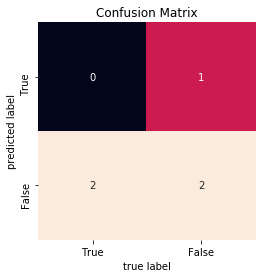

In [223]:
lucem_illud_2020.plotConfusionMatrix(logistic, test_df)

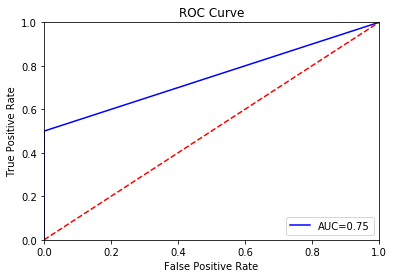

In [222]:
# ROC curve
fpr, tpr, threshold = sklearn.metrics.roc_curve(test_df['category'], test_df['pred_label'])
roc_auc=sklearn.metrics.auc(fpr, tpr)
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Naive Bayes

In [229]:
# Naive Bayes
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_df['vect'], axis=0), train_df['category'])

print("Training:")
print(naiveBayes.score(np.stack(train_df['vect'], axis=0), train_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_df['vect'], axis=0), test_df['category']))

test_df['nb_predict'] = naiveBayes.predict(np.stack(test_df['vect'],
                                                    axis=0))
test_df['nb_predict_prob_true'] = naiveBayes. \
                                  predict_proba(np.stack(test_df['vect'],
                                                          axis=0))[:,0]
precision = sklearn.metrics.precision_score(test_df['nb_predict'], test_df['category'])
recall = sklearn.metrics.recall_score(test_df['nb_predict'], test_df['category'])
f_1 = sklearn.metrics.f1_score(test_df['nb_predict'], test_df['category'])

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F-1: {f_1}')

Training:
0.9
Testing:
0.4
Precision: 0.25
Recall: 1.0
F-1: 0.4


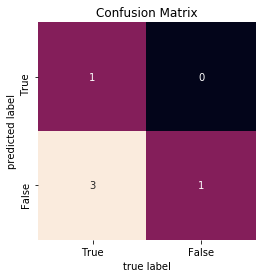

In [232]:
# Confusion matrix
lucem_illud_2020.plotConfusionMatrix(naiveBayes, test_df)

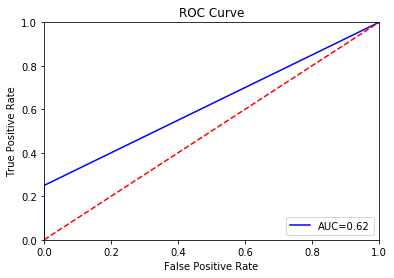

In [234]:
# ROC curve
fpr, tpr, threshold = sklearn.metrics.roc_curve(test_df['category'], test_df['nb_predict'])
roc_auc=sklearn.metrics.auc(fpr,tpr)
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

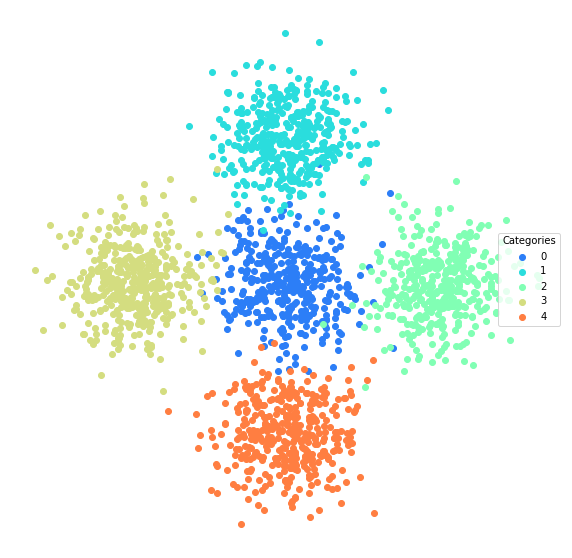

In [235]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [236]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

To see what's going on visually with the classification: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

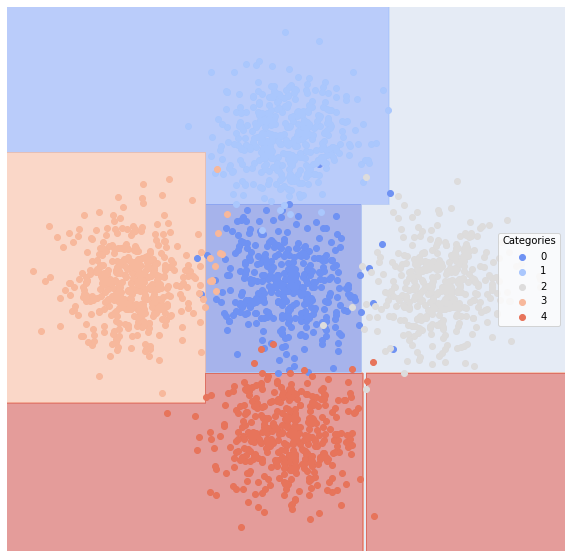

In [237]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [239]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.020,0.975439,0.950820,0.927126,0.966667
1,0.014,0.975659,0.968750,0.936802,0.958763
2,0.004,0.993972,0.990476,0.983043,0.990476
3,0.000,1.000000,1.000000,1.000000,1.000000
4,0.006,0.988846,0.990000,0.974396,0.980198


Lets look at accuracy:

In [240]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.978

What happens if we trim the tree?

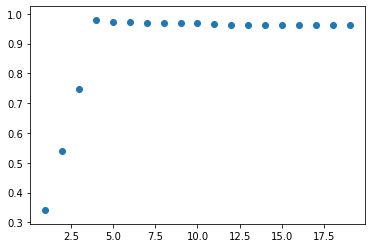

In [241]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [242]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [243]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

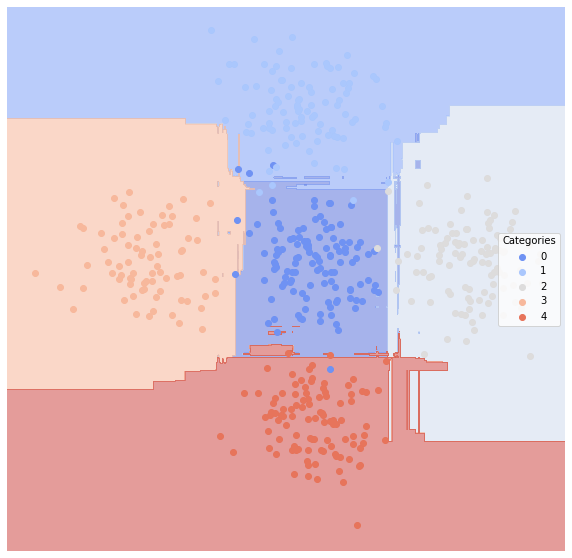

In [244]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [245]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.026,0.960088,0.957265,0.909447,0.933333
1,0.010,0.982055,0.979167,0.954883,0.969072
2,0.006,0.989210,0.990385,0.975520,0.980952
3,0.006,0.996454,0.962500,0.962500,1.000000
4,0.004,0.997494,0.980583,0.980583,1.000000


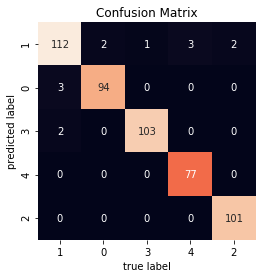

In [246]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False           0.05  0.954545        0.9           0.900000  1.000000
True            0.05  0.954545        1.0           0.959091  0.909091


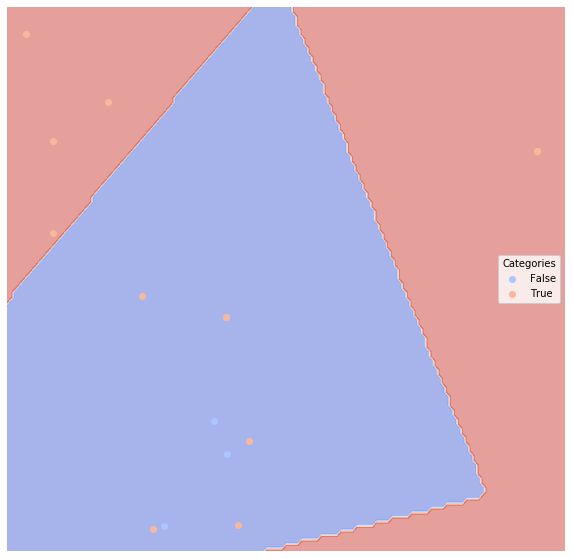

In [248]:
# Train data
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=5, random_state=0)
clf_tree.fit(np.stack(train_df['vect'], axis=0), train_df['category'])
print(lucem_illud_2020.evaluateClassifier(clf_tree, train_df))
lucem_illud_2020.plotregions(clf_tree, train_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
False            0.8  0.125        0.0              0.200    0.00
True             0.8  0.125        0.5              0.725    0.25


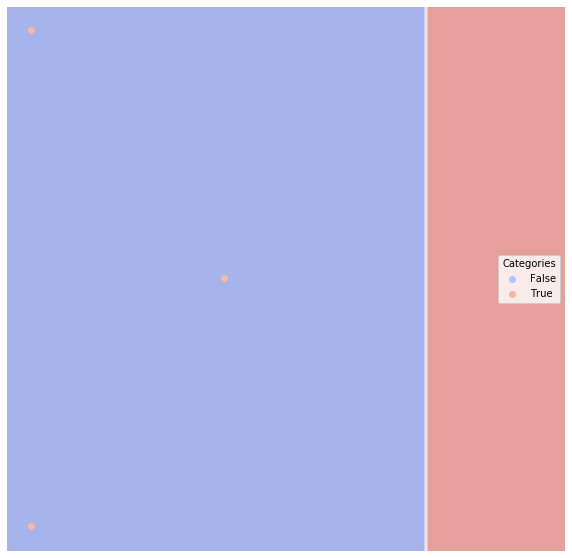

In [249]:
# Test data
print(lucem_illud_2020.evaluateClassifier(clf_tree, test_df))
lucem_illud_2020.plotregions(clf_tree, test_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False           0.05  0.954545        0.9           0.900000  1.000000
True            0.05  0.954545        1.0           0.959091  0.909091


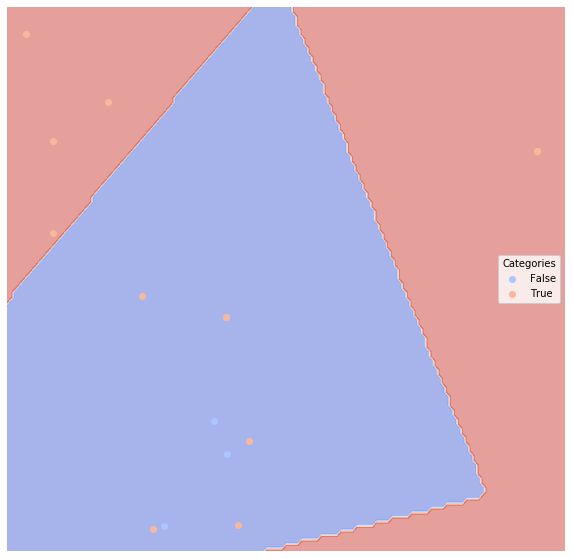

In [251]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.
bag = sklearn.ensemble.BaggingClassifier(tree,
                                         n_estimators=100,
                                         max_samples=0.8,
                                         random_state=1) #Each tree uses up to 80% of the data
bag.fit(np.stack(train_df['vect'], axis=0),
        train_df['category']) #Fit the bagged classifier
print(lucem_illud_2020.evaluateClassifier(clf_tree, train_df))
lucem_illud_2020.plotregions(clf_tree, train_df)

          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
False            0.8  0.125        0.0              0.200    0.00
True             0.8  0.125        0.5              0.725    0.25


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


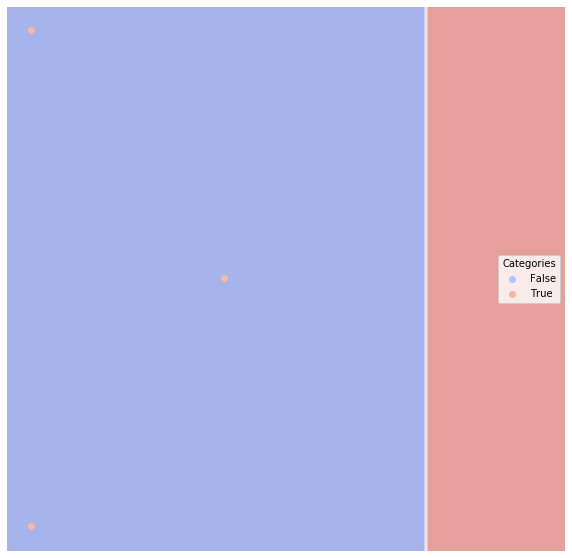

In [252]:
print(lucem_illud_2020.evaluateClassifier(clf_tree, test_df))
lucem_illud_2020.plotregions(bag, test_df)

In [ ]:
# Comparison w/ sklearn random forest

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [253]:
newsgroupsDF[:5]

,text,category,source_file,tokenized_text,normalized_text
0,\n\nParadise and salvation are not the same th...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Paradise, and, salvation, are, not, the, same...","[paradise, salvation, thing, salvation, better..."
1,\nYou're admitting a lot more than that. You ...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[You, 're, admitting, a, lot, more, than, that...","[admit, lot, admit, moral, situational, admit,..."
2,"\n\nJesus also recognized other holy days, lik...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Jesus, also, recognized, other, holy, days, l...","[jesus, recognize, holy, day, like, passover, ..."
3,In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[In, <, lsjc8cINNmc1@saltillo.cs.utexas.edu, >...","[<, lsjc8cinnmc1@saltillo.cs.utexas.edu, >, tu..."
4,"\nI'm sorry, but He does not! Ever read the F...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[I, 'm, sorry, but, He, does, not, Ever, read,...","[m, sorry, read, commandment]"


Make a testing and training set:

In [254]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [255]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [256]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [257]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [258]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
soc.religion.christian,0.244922,0.569388,1.000000,0.383697,0.138776
talk.religion.misc,0.281486,0.685326,0.351494,0.289789,0.632911
comp.graphics,0.271619,0.573094,0.455285,0.308179,0.251121
sci.space,0.434707,0.575059,0.334524,0.309851,0.596603


And lets look at the testing data

In [259]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.2744186046511628


Let's produce another confusion matrix:

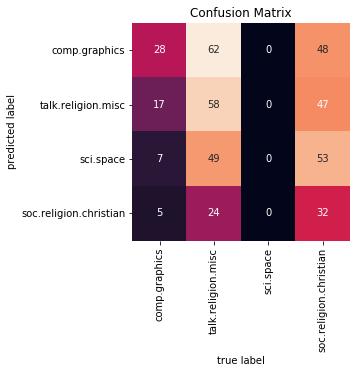

In [260]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [ ]:
#lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [261]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
TFVects_ng = TFVectorizer_ng.fit_transform(train_df['text'])
train_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False            0.5  0.484848   0.428571           0.442857  0.333333
True             0.5  0.484848   0.538462           0.542657  0.636364


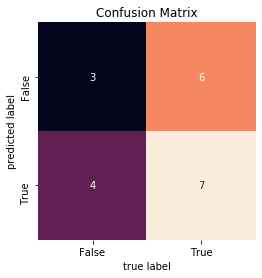

In [272]:
# Training
clf_knearest.fit(np.stack(train_df['vect'], axis=0), train_df['category'])
print(lucem_illud_2020.evaluateClassifier(clf_knearest, train_df))
lucem_illud_2020.plotConfusionMatrix(clf_knearest, train_df)

Testing score:
          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False            0.4  0.75   0.333333           0.333333     1.0
True             0.4  0.75   1.000000           0.900000     0.5


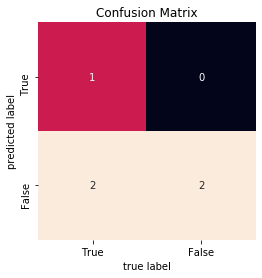

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False            0.4  0.75   0.333333           0.333333     1.0
True             0.4  0.75   1.000000           0.900000     0.5


In [273]:
# Testing
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_df['knn_predict'] = clf_knearest.predict(np.stack(test_df['vect'], axis=0))

#Test
print("Testing score:")
print(lucem_illud_2020.evaluateClassifier(clf_knearest, test_df))
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_df)
print(lucem_illud_2020.evaluateClassifier(clf_knearest, test_df))

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [274]:
redditDf = pd.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [275]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [276]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [277]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability=False)
#probability = True is slower but lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

...and consider the results:

In [278]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Relationships,0.015674,0.979867,0.958333,0.937608,0.971831
Weeaboo Tales: stories about the extreme fans of japanese culture,0.003135,0.993827,1.000000,0.990789,0.987654
Bad Roommates: Tales of Irritation,0.015674,0.979598,0.978495,0.956670,0.968085
Tales From Tech Support,0.009404,0.989086,0.972973,0.962779,0.986301


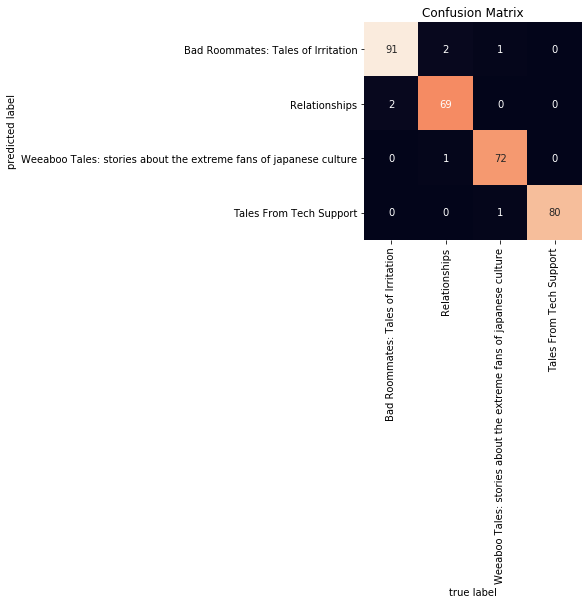

In [279]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

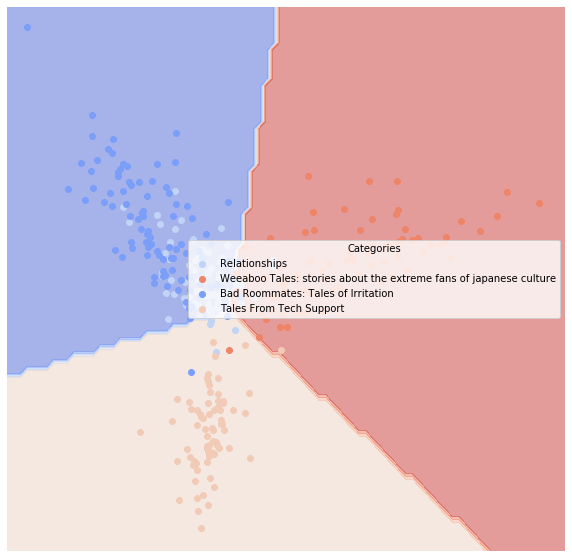

In [280]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [281]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [282]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Relationships,0.018809,0.972825,0.957746,0.926683,0.957746
Weeaboo Tales: stories about the extreme fans of japanese culture,0.003135,0.993827,1.000000,0.990789,0.987654
Bad Roommates: Tales of Irritation,0.021944,0.972057,0.967742,0.939101,0.957447
Tales From Tech Support,0.006270,0.995935,0.973333,0.973333,1.000000


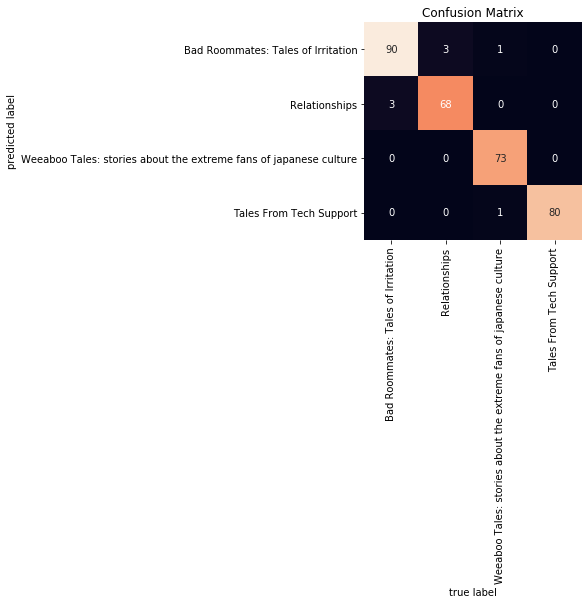

In [283]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

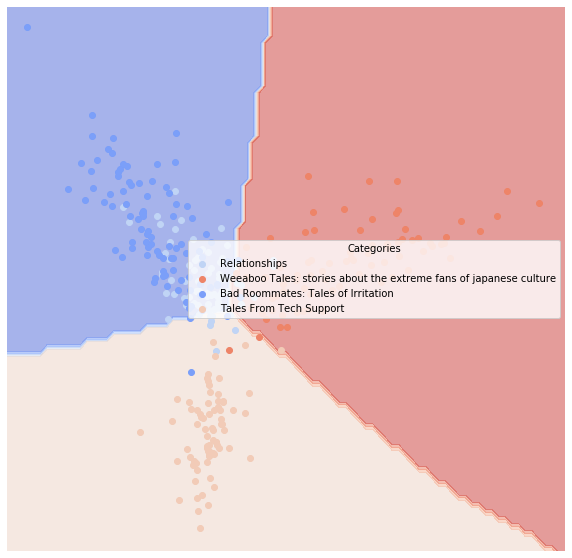

In [284]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [285]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_df['vect'], axis=0), train_df['category'])

/Users/katykoeing/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False           0.05  0.954545        0.9           0.900000  1.000000
True            0.05  0.954545        1.0           0.959091  0.909091


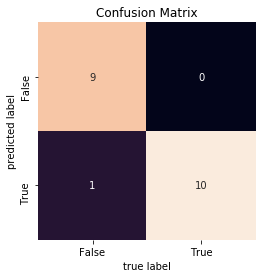

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


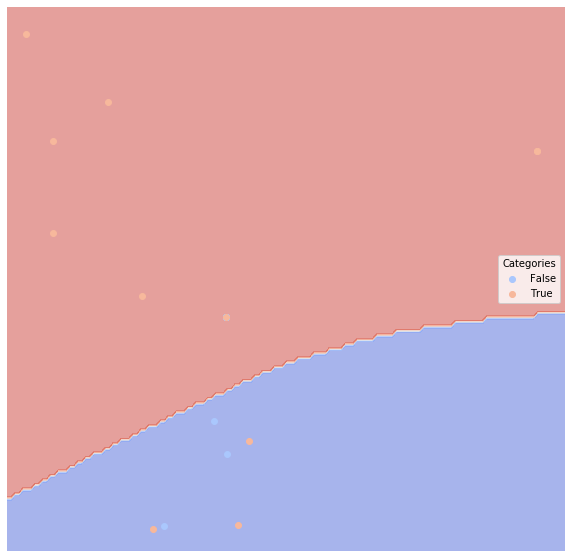

In [286]:
# training
print(lucem_illud_2020.evaluateClassifier(clf_nn, train_df))
lucem_illud_2020.plotConfusionMatrix(clf_nn, train_df)
lucem_illud_2020.plotregions(clf_nn, train_df)

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False            0.6  0.25   0.000000           0.200000     0.0
True             0.6  0.25   0.666667           0.733333     0.5


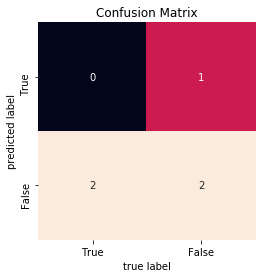

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


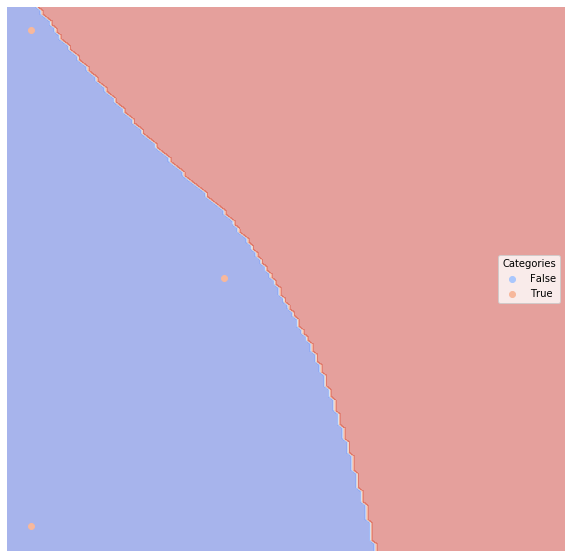

In [287]:
# Testing
print(lucem_illud_2020.evaluateClassifier(clf_nn, test_df))
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_df)
lucem_illud_2020.plotregions(clf_nn, test_df)

comparison to prev classifiers